In [ ]:
import numpy as np
from numpy import genfromtxt

In [ ]:
data_path = 'g_data.csv'
my_data = genfromtxt(data_path, delimiter=',')

In [ ]:
print(type(my_data))
print(my_data.shape)

<class 'numpy.ndarray'>
(1700, 2)


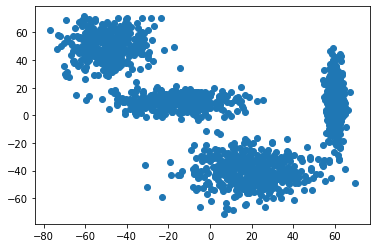

In [ ]:
import matplotlib.pyplot as plt 

plt.scatter(my_data[:,0], my_data[:,1])

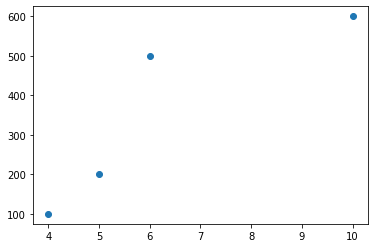

In [ ]:
import matplotlib.pyplot as plt 

a = [4, 5, 6, 10]
b = [100, 200, 500, 600]
plt.scatter(a, b)

In [ ]:

def eucledean_distance(sample, center):
    #distance = abs(center[0]-sample[0]) + abs(center[1]-sample[1])
    distance = ((center[0]-sample[0])**2 + (center[1]-sample[1])**2)**0.5
    return distance

In [ ]:
import matplotlib.pyplot as plt 

K = 2

In [ ]:
import random
import copy


data = my_data.tolist()
inertia_list = []

random.seed(11202009)

K = 2
centers_set = set()     #sets cannot have multiple occurance of the same value
while len(centers_set)<K:
    num = random.randint(0, len(data))    #randomly generating k centers
    centers_set.add(num)
centers = []
for i in centers_set:
    centers.append(data[i])
#print(centers)

clusters = []
for i in range(K):
    clusters.append([])   
min_dis = 99999999 
index = 0   
for sample in data:
    for i in range(K):
        dis = eucledean_distance(sample, centers[i])
        if dis < min_dis:
            min_dis = dis
            index = i
    
    clusters[index].append(sample)

# for i in range(K):
#     print(clusters[i])

itr = 1
shift = 1   #to initially enter the while loop, later shift is changed to 0
flag = 0    #to keep track of change
while(flag != 1):
    # sum_x = 0
    # sum_y = 0
    for i in range(K):
        sum_x = 0
        sum_y = 0
        if(len(clusters[i]) != 0):
            for j in range(len(clusters[i])):
                sum_x = sum_x + clusters[i][j][0]
                sum_y = sum_y + clusters[i][j][1]

            
            center_x = sum_x / (len(clusters[i]))  
            center_y = sum_y / (len(clusters[i]))

            center_updated = [center_x, center_y]

            centers[i] = center_updated

    if itr > 1 and shift < 50:
        break   #convergence

    shift = 0

    temp_clusters = []
    for i in range(K):
        temp_clusters.append([])   

    min_dis = 99999999 
    index = 0   
    for sample in data:
        for i in range(K):
            dis = eucledean_distance(sample, centers[i])
            if dis < min_dis:
                min_dis = dis
                index = i
    
        temp_clusters[index].append(sample)
        
        index_clusters = 0
        for m in range(K):
            for n in range(len(clusters[m])):
                if(clusters[m][n] == sample):
                      index_clusters = m
        
        if index_clusters != index:
            shift = shift + 1
            flag = 0
        else:
            flag = 1

     
    clusters = copy.deepcopy(temp_clusters)  
    itr = itr + 1
    if itr>100:break


inertia = 0
for i in range(K):
    for j in range(len(clusters[i])):
        dis = eucledean_distance(clusters[i][j], centers[i])
        inertia = inertia + dis

print(K, inertia)
inertia_list.append(inertia)  


2 61371.56045051292


In [ ]:
# i = 0
# k = 0
# for S in my_data:
#     clusters[k].append(i)
#     i+=1
    
#     if i==500:
#         k+=1
#     elif i==500+400:
#         k+=1
#     elif i==500+400+350:
#         k+=1

In [ ]:
#import matplotlib.pyplot as plt 

In [ ]:
#len(clusters)

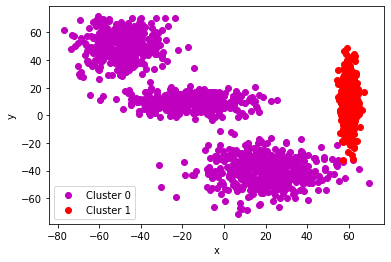

In [ ]:
# colors = ['m', 'r', 'g', 'b', 'c', 'k', 'y']
# for k in range(K):
#     x, y = [], []
#     for i in clusters[k]:
#         x.append(my_data[i][0])
#         y.append(my_data[i][1])
#     plt.scatter(x, y, c=colors[k], label="Cluster "+str(k))
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend(loc='lower left')
# plt.show()



#print(len(clusters))

colors = ['m', 'r', 'g', 'b', 'c', 'k', 'y']
for k in range(K):
    x = []
    y = []
    for i in range(len(clusters[k])):
        x.append(clusters[k][i][0])
        y.append(clusters[k][i][1])
    plt.scatter(x, y, c=colors[k], label="Cluster "+str(k))
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='lower left')
plt.show()

K = 4

In [ ]:
K = 4
centers = []
for k in range(K):
    num = random.randint(0, len(data))    #randomly generating k centers
    centers.append(data[num])
#print(centers)

clusters = []
for i in range(K):
    clusters.append([])   
min_dis = 99999999 
index = 0   
for sample in data:
    for i in range(K):
        dis = eucledean_distance(sample, centers[i])
        if dis < min_dis:
            min_dis = dis
            index = i
    
    clusters[index].append(sample)

# for i in range(K):
#     print(clusters[i])

itr = 1
shift = 1   #to initially enter the while loop, later shift is changed to 0
flag = 0
while(flag != 1):
    
    for i in range(K):
        sum_x = 0
        sum_y = 0
        if(len(clusters[i]) != 0):
            for j in range(len(clusters[i])):
                sum_x = sum_x + clusters[i][j][0]
                sum_y = sum_y + clusters[i][j][1]

            
            center_x = sum_x / (len(clusters[i]))  
            center_y = sum_y / (len(clusters[i]))

            center_updated = [center_x, center_y]

            centers[i] = center_updated

    if itr > 1 and shift < 50:
        break   #convergence

    shift = 0

    temp_clusters = []
    for i in range(K):
        temp_clusters.append([])   

    min_dis = 99999999 
    index = 0   
    for sample in data:
        for i in range(K):
            dis = eucledean_distance(sample, centers[i])
            if dis < min_dis:
                min_dis = dis
                index = i
    
        temp_clusters[index].append(sample)
        
        index_clusters = 0
        for m in range(K):
            for n in range(len(clusters[m])):
                if(clusters[m][n] == sample):
                    index_clusters = m
        
        if index_clusters != index:
            shift = shift + 1
            flag = 0
        else:
            flag = 1

        

     
    clusters = copy.deepcopy(temp_clusters)  
    itr = itr + 1
    if(itr > 100): break


inertia = 0
for i in range(K):
    for j in range(len(clusters[i])):
        dis = eucledean_distance(clusters[i][j], centers[i])
        inertia = inertia + dis

print(K, inertia)
inertia_list.append(inertia)  

4 78933.39183898819


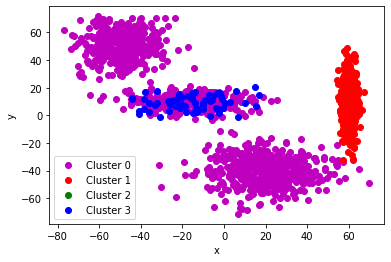

In [ ]:
#print(len(clusters))

colors = ['m', 'r', 'g', 'b', 'c', 'k', 'y']
for k in range(K):
    x = []
    y = []
    for i in range(len(clusters[k])):
        x.append(clusters[k][i][0])
        y.append(clusters[k][i][1])
    plt.scatter(x, y, c=colors[k], label="Cluster "+str(k))
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='lower left')
plt.show()

K = 6

In [ ]:
K = 6
centers = []
for k in range(K):
    num = random.randint(0, len(data))    #randomly generating k centers
    centers.append(data[num])
#print(centers)

clusters = []
for i in range(K):
    clusters.append([])   
min_dis = 99999999 
index = 0   
for sample in data:
    for i in range(K):
        dis = eucledean_distance(sample, centers[i])
        if dis < min_dis:
            min_dis = dis
            index = i
    
    clusters[index].append(sample)

# for i in range(K):
#     print(clusters[i])

itr = 1
shift = 1   #to initially enter the while loop, later shift is changed to 0
flag = 0
while(flag != 1):
    
    for i in range(K):
        sum_x = 0
        sum_y = 0
        if(len(clusters[i]) != 0):
            for j in range(len(clusters[i])):
                sum_x = sum_x + clusters[i][j][0]
                sum_y = sum_y + clusters[i][j][1]

            
            center_x = sum_x / (len(clusters[i]))  
            center_y = sum_y / (len(clusters[i]))

            center_updated = [center_x, center_y]

            centers[i] = center_updated

    if itr > 1 and shift < 50:
        break   #convergence

    shift = 0

    temp_clusters = []
    for i in range(K):
        temp_clusters.append([])   

    min_dis = 99999999 
    index = 0   
    for sample in data:
        for i in range(K):
            dis = eucledean_distance(sample, centers[i])
            if dis < min_dis:
                min_dis = dis
                index = i
    
        temp_clusters[index].append(sample)
        
        index_clusters = 0
        for m in range(K):
            for n in range(len(clusters[m])):
                if(clusters[m][n] == sample):
                      index_clusters = m
        
        if index_clusters != index:
            shift = shift + 1
            flag = 0
        else:
            flag = 1
        

     
    clusters = copy.deepcopy(temp_clusters)  
    itr = itr + 1
    if itr>100: break;


inertia = 0
for i in range(K):
    for j in range(len(clusters[i])):
        dis = eucledean_distance(clusters[i][j], centers[i])
        inertia = inertia + dis

print(K, inertia)
inertia_list.append(inertia)  

6 78856.55490515106


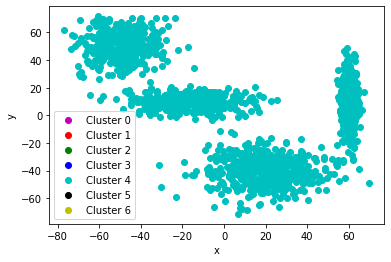

In [ ]:
#print(len(clusters))

colors = ['m', 'r', 'g', 'b', 'c', 'k', 'y']
for k in range(K):
    x = []
    y = []
    for i in range(len(clusters[k])):
        x.append(clusters[k][i][0])
        y.append(clusters[k][i][1])
    plt.scatter(x, y, c=colors[k], label="Cluster "+str(k))
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='lower left')
plt.show()

K = 7

In [ ]:
K = 7
centers = []
for k in range(K):
    num = random.randint(0, len(data))    #randomly generating k centers
    centers.append(data[num])
#print(centers)

clusters = []
for i in range(K):
    clusters.append([])   
min_dis = 99999999 
index = 0   
for sample in data:
    for i in range(K):
        dis = eucledean_distance(sample, centers[i])
        if dis < min_dis:
            min_dis = dis
            index = i
    
    clusters[index].append(sample)

# for i in range(K):
#     print(clusters[i])

itr = 1
shift = 1   #to initially enter the while loop, later shift is changed to 0
flag = 0
while(flag != 1):
  
    for i in range(K):
        sum_x = 0
        sum_y = 0
        if(len(clusters[i]) != 0):
            for j in range(len(clusters[i])):
                sum_x = sum_x + clusters[i][j][0]
                sum_y = sum_y + clusters[i][j][1]

            
            center_x = sum_x / (len(clusters[i]))  
            center_y = sum_y / (len(clusters[i]))

            center_updated = [center_x, center_y]

            centers[i] = center_updated

    if itr > 1 and shift < 50:
        break   #convergence

    shift = 0

    temp_clusters = []
    for i in range(K):
        temp_clusters.append([])   

    min_dis = 99999999 
    index = 0   
    for sample in data:
        for i in range(K):
            dis = eucledean_distance(sample, centers[i])
            if dis < min_dis:
                min_dis = dis
                index = i
    
        temp_clusters[index].append(sample)
        
        index_clusters = 0
        for m in range(K):
            for n in range(len(clusters[m])):
                if(clusters[m][n] == sample):
                      index_clusters = m
        
        if index_clusters != index:
            shift = shift + 1
            flag = 0
        else:
            flag = 1

     
    clusters = copy.deepcopy(temp_clusters)  
    itr = itr + 1
    if itr>100: break;


inertia = 0
for i in range(K):
    for j in range(len(clusters[i])):
        dis = eucledean_distance(clusters[i][j], centers[i])
        inertia = inertia + dis

print(K, inertia)
inertia_list.append(inertia)  

7 106653.11113302816


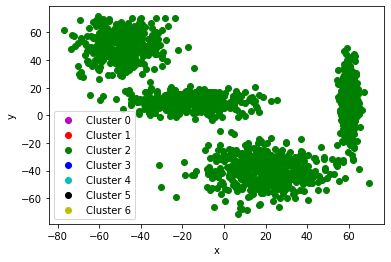

In [ ]:
#print(len(clusters))

colors = ['m', 'r', 'g', 'b', 'c', 'k', 'y']
for k in range(K):
    x = []
    y = []
    for i in range(len(clusters[k])):
        x.append(clusters[k][i][0])
        y.append(clusters[k][i][1])
    plt.scatter(x, y, c=colors[k], label="Cluster "+str(k))
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='lower left')
plt.show()

In [ ]:
# import pandas as pd
# from sklearn.cluster import KMeans

In [ ]:
# km = KMeans(n_clusters=2, init='random')
# km.fit(my_data)

KMeans(init='random', n_clusters=2)

In [ ]:
# prediction = km.predict(my_data)

In [ ]:
# prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# train_plot = pd.DataFrame(my_data)
# train_plot['cluster_index'] = pd.Series(prediction)
# train_plot.plot.scatter(x=0, y=1, c='cluster_index', colormap='jet')

[4881827.715322591, 1860828.3048688164, 905422.1829371476, 411576.1696791684, 344808.7680396233, 287558.6770434811, 235340.54228102154, 211348.4782941885, 190839.36656125291]


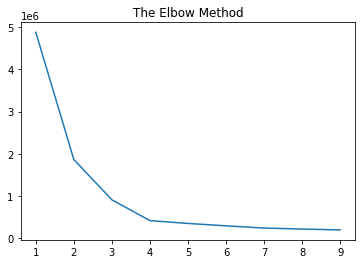

In [ ]:
# import matplotlib.pyplot as plt
# cost = []

# K = range(1,10)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k)
#     kmeanModel.fit(my_data)
#     cost.append(kmeanModel.inertia_)

# print(cost)
# plt.plot(K, cost)
# plt.title('The Elbow Method')
# plt.show()

Rough (Not part of the algorithm)

In [ ]:
# import random
# for i in range(4):
#     num = random.randint(0,100)
#     print(num)


# import random
# data = my_data.tolist()

# K = 4
# centers = []
# for k in range(K):
#     num = random.randint(0, len(data))    #randomly generating k centers
#     centers.append(data[num])
# #print(centers)

# clusters = [[]]
# for i in range(K):
#     clusters.append([])
# #min_dis = 99999999    
# index = 0
# distance = []
# for sample in data:
#     for i in range(K):
#         dis = eucledean_distance(sample, centers[i])
#         distance.append(dis)
    
#     min_dis = distance[0]
#     for i in range(len(distance)):
#         if distance[0] < min_dis:
#             min_dis = distance[0]
#             index = i

#     clusters[index].append(sample)

# for i in range(4):
#     print(clusters[i])



# import copy
# a = [[2, 3, 4], 5]
# b = [2,3,4]

# b = copy.deepcopy(a)

# print(b)
# x = []
# y = []

# for i in range(len(data)):
#     x.append(data[i][0])

# print(x)

# K = 2
# centerss = set()
# while len(centerss)<K:
#     num = random.randint(0, len(data))    #randomly generating k centers
#     centerss.add(num)
# centers = []
# for i in centerss:
#     centers.append(data[i])
# print(centers)

[[14.717230562767552, -45.99321386591052], [-24.730063537149885, 13.560106385505243]]
